# Buying vs Renting comparison
## Libraries
These are the Python libraries used in the project

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## Assumptions and variables
These are the numbers you need to change according to your specific needs

In [5]:
# Assumptions
home_price = 400_000
rent_per_month = 2495
down_payment_pct = 5 / 100
fixed_buying_costs_percent = 2 / 100
mortgage_rate = 7 / 100 / 12
mortgage_years = 30
income = 80_000
annual_salary_increase = 3 / 100
sp500_return = 8 / 100
home_appreciation = 1 / 100  # Home appreciation rate adjusted for inflation
living_expenses_percent = 30 / 100
property_tax_percent = 1 / 100
insurance_cost = 1500  # Annual home insurance
community_fee = 1000  # Annual community fee
maintenance_cost_percent = 1 / 100
inflation_rent = 3 / 100

## Calculations
From here on, the magic happens. You don't need to touch anything else but feel free to do so if you'd like :)

Final net worth after 30 years:
Buying: $4,645,397.06
Renting: $4,579,687.37


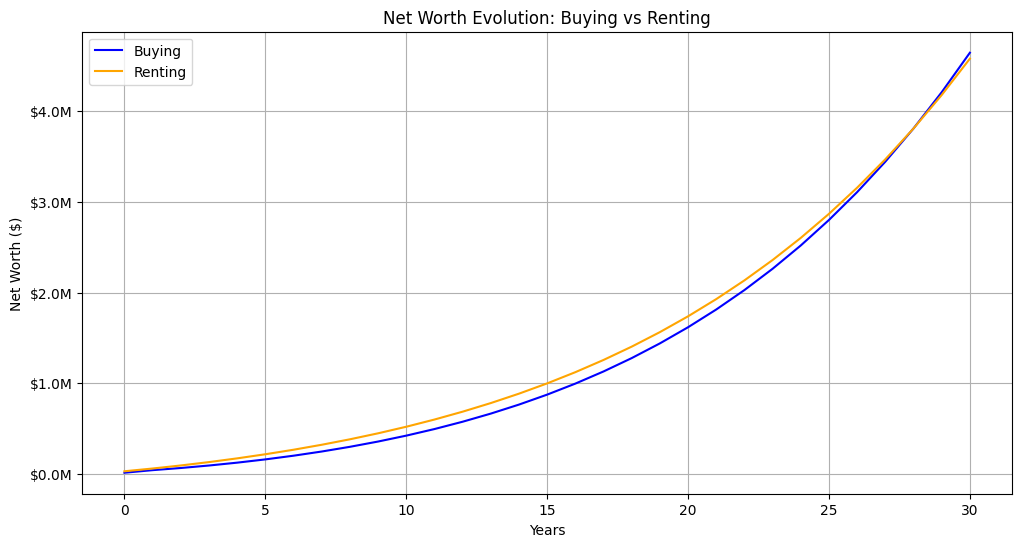

In [6]:
# Derived values
down_payment = home_price * down_payment_pct
monthly_income = income / 12
mortgage_months = mortgage_years * 12
loan_amount = home_price - down_payment
monthly_mortgage_payment = loan_amount * (mortgage_rate * (1 + mortgage_rate)**mortgage_months) / ((1 + mortgage_rate)**mortgage_months - 1)

# Initial costs for buying
fixed_buying_costs = home_price * fixed_buying_costs_percent
upfront_costs_buying = down_payment + fixed_buying_costs
initial_net_worth_buying = down_payment - fixed_buying_costs  # Initial equity minus fixed costs
initial_net_worth_renting = upfront_costs_buying  # Initial investment for renting

# Initialize variables for simulation
years = 30
months = years * 12
net_worth_buying = [initial_net_worth_buying]
net_worth_renting = [initial_net_worth_renting]
savings_buying = 0
savings_renting = upfront_costs_buying  # Start with the same upfront costs invested in SP500
home_equity = down_payment_pct * home_price  # Initial equity in the house

# Simulation loop
for year in range(1, years + 1):
    annual_income = income * ((1 + annual_salary_increase)**(year - 1))
    annual_living_expenses = annual_income * living_expenses_percent

    # BUYING CALCULATIONS
    annual_mortgage_payment = monthly_mortgage_payment * 12
    property_tax = home_price * property_tax_percent
    maintenance_cost = home_price * maintenance_cost_percent
    total_home_costs = annual_mortgage_payment + property_tax + insurance_cost + maintenance_cost + community_fee

    # Equity in the home (principal paid)
    principal_paid = min(loan_amount, annual_mortgage_payment - (loan_amount * mortgage_rate * 12))
    loan_amount -= principal_paid
    home_equity += principal_paid
    home_price *= (1 + home_appreciation)  # Home appreciates in value

    # Savings left to invest
    investable_buying = annual_income - annual_living_expenses - total_home_costs
    savings_buying += max(investable_buying, 0)
    savings_buying *= (1 + sp500_return)

    # Total net worth for buying
    net_worth_buying.append(savings_buying + (home_equity * (1 + home_appreciation) ** year))

    # RENTING CALCULATIONS
    annual_rent = rent_per_month * (1 + inflation_rent)**(year - 1) * 12
    investable_renting = annual_income - annual_living_expenses - annual_rent
    savings_renting += max(investable_renting, 0)
    savings_renting *= (1 + sp500_return)

    # Total net worth for renting
    net_worth_renting.append(savings_renting)

# Final Results
print(f"Final net worth after {years} years:")
print(f"Buying: ${net_worth_buying[-1]:,.2f}")
print(f"Renting: ${net_worth_renting[-1]:,.2f}")

# Function to format the y-axis in millions
def millions_formatter(x, pos):
    return f'${x / 1_000_000:.1f}M'

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(years + 1), net_worth_buying, label="Buying", color="blue")
plt.plot(range(years + 1), net_worth_renting, label="Renting", color="orange")
plt.title("Net Worth Evolution: Buying vs Renting")
plt.xlabel("Years")
plt.ylabel("Net Worth ($)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend()
plt.grid()
plt.show()